## TECHIN 513 HW1 – Modifying Signals

Anqi Pan

(This should be a markup cell, which means that when you run it you just get formated text.)

In [ ]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
%pip install simpleaudio
%pip install scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import simpleaudio as sa
# import whatever other modules you use in this lab -- there are more that you need than we've included 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week hw.  You should plan on completing the first 2 assignments in the first week.

## HW 1 turn in checklist

•	your Jupyter or Colab notbooks (uploaded as .pdf with your outputs).

Note: You can work together but you need to submit your own work. do not copy paste from each other


## Assignment 1 -- Working with sound files

In [ ]:
# Assignment 1 - Time Scaling Function

# Part A

import scipy.io.wavfile as wav

# read in train.wav file
def read_wav(fn):
  fs, data = wav.read(fn)
  return fs, data

fs1, x1 = read_wav('train32.wav')

# print the sampling rate and shape of x1
print("Sampling rate =: ", fs1)
print("Shape of x1: ", x1.shape)



Sampling rate =:  32000
Shape of x1:  (50313,)


In [ ]:
# Part B

import scipy.io.wavfile as wav

# write out two new versions of the file with different sampling rates
fs2 = int(fs1/2)
fs3 = int(1.5*fs1)

wav.write('train_16kHz.wav', fs2, x1)
wav.write('train_48kHz.wav', fs3, x1)




In [ ]:
# Part C

import simpleaudio as sa

# read in and play the three different versions of the train sound file
train_original = sa.WaveObject.from_wave_file("train32.wav")
train_16kHz = sa.WaveObject.from_wave_file("train_16kHz.wav")
train_48kHz = sa.WaveObject.from_wave_file("train_48kHz.wav")


play_obj = train_original.play()
play_obj.wait_done()

play_obj = train_16kHz.play()
play_obj.wait_done()

play_obj = train_48kHz.play()
play_obj.wait_done()

###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.

If the sampling frequency is being set higher than it should be, the audio would be in higher pitch and shorter, and vice versa.


## Assignment 2 -- Amplitude Operations on Signals

In [ ]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# TODO: Code that solves A
# Start with a comment section that explains what the input variables are

# Create a discrete time signal s1 that is the same length as x1 and has value 1 for t=[0,0.5] and value 0.2 for t>0.5.

import numpy as np
from scipy.io.wavfile import read, write

# Read in the wav file and get the sample rate and data
fs, x1 = read("train32.wav")

#Determine the index corresponding to t=0.5
n0 = int(0.5*fs)

#Create the signal s1
s1 = np.concatenate((np.ones(n0),0.2*np.ones(len(x1)-n0)))

#Multiply x1 with s1 to create v1
v1 = x1 * s1

#Save v1 to a wav file
wav.write("modified_train.wav", fs, v1)



In [ ]:
# Part B
# TODO: Code that solves B

# Create a discrete-time decaying ramp signal r1, that is the same length as x1. The signal should have value 1 at time 0 and linearly decay to value 0.
# Create the signal r1
r1 = np.linspace(1, 0, len(x1))

# #Multiply x1 with r1 to create v2
v2 = x1 * r1

# Save v2 to a wav file
wav.write("modified_train2.wav", fs, v2)

In [ ]:
# Part C
# TODO: Code that solves C

# Read in v1 and v2 using simpleaudio and play the two different modifications together with the original, to verify that the volume of the second whistle is reduced.

import simpleaudio as sa
wav.write("modified_train.wav", np.round(fs), x1)
wav.write("modified_train2.wav", np.round(fs), x1)

# Read in the original train.wav, v1, and v2
original = sa.WaveObject.from_wave_file("train32.wav")
modified1 = sa.WaveObject.from_wave_file("modified_train.wav")
modified2 = sa.WaveObject.from_wave_file("modified_train2.wav")

# Play the original one
original.play()

# Play the modified versiona together with the original one
play_obj1 = modified1.play()
play_obj2 = modified2.play()
play_obj1.wait_done()
play_obj2.wait_done()


###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range? If you wanted a smooth but faster decay in amplitude, what signal might you use? 


In the first modification, there is no change for the first half second and then the sound decreases rapidly due to the amplitude being multiplied by 0.2. In contrast, the second modification gradually reduces the sound's amplitude from its original level to zero. If we set s1 to a value of 2 for the first half second, the sound's amplitude would theoretically be doubled (resulting in a much louder sound) during this time. However, when tested, this caused the speaker's sound to crack.

If we want a smooth but faster decay in amplitude, we might use an exponential decay signal, such as an exponentially decaying sine wave or an exponentially decaying cosine wave. This would provide a smooth decay in amplitude, but at a faster rate than a linear decay.

## Assignment 3 -- Time Scaling Audio Signals 

In [ ]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A

import numpy as np
from scipy.signal import resample


def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x.astype('float'),d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t



In [98]:
# Part B
# TODO: Code that solves B

w, t_w = timescale(x1, fs1, 2)
wav.write('train32_timescale2.wav', fs1, w)

v, t_v = timescale(x1, fs1, 0.5)
wav.write('train32_timescalehalf.wav', fs1, v)

z, t_z = np.flip(x1), timescale(x1, fs1, 1)[1]
z = np.ascontiguousarray(z)
wav.write('train32_reverse.wav', fs1, z)


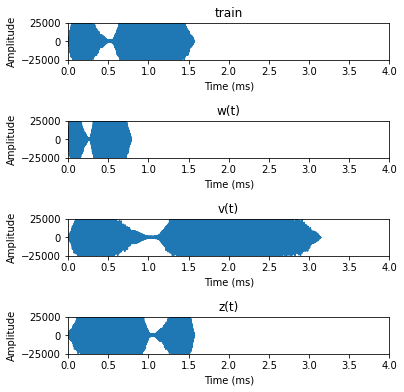

In [99]:
# Part C
# TODO: Code that solves C
%matplotlib inline

fig, axes = plt.subplots(4, 1, figsize=(6, 6))
fig.tight_layout(pad=4.0)
data_list = [x1, w, v, z]
t_list = [t_z, t_w, t_v, t_z]
title_list = ['train', 'w(t)', 'v(t)', 'z(t)']

for i in range(len(data_list)):
    data = data_list[i]
    t = t_list[i]
    title = title_list[i]
    ax = axes[i]
    ax.set_xlim(0, 4)
    ax.set_ylim(-25000, 25000)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Amplitude')
    ax.plot(t, data)
    ax.set_title(title)

plt.show()


In [ ]:
# Part D
# TODO: Code that solves D

wave_obj = sa.WaveObject.from_wave_file('train32_timescale2.wav')
play_obj = wave_obj.play()
play_obj.wait_done()

wave_obj = sa.WaveObject.from_wave_file('train32_timescalehalf.wav')
play_obj = wave_obj.play()
play_obj.wait_done()

wave_obj = sa.WaveObject.from_wave_file('train32_reverse.wav')
play_obj = wave_obj.play()
play_obj.wait_done()

###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?

Instead of being displayed together in a single figure with multiple subplots, each subplot will have its own individual figure window. Additionally, the subplots will not have a shared x-axis and y-axis, resulting in independent scales and ranges for each subplot. This may make it more difficult to compare the various subplots.

## Assignment 4 -- Time Shift Operations

In [102]:
# Part A
# TODO: Code that solves A

def timeshift(x, fs, t0):
    n0 = abs(int(t0*fs))
    if t0 == 0:
        y = x
    elif t0 < 0:
        y = np.concatenate((np.zeros(n0), x))
    else:
        if n0 > len(x):
            y = np.zeros(len(x))
        else:
            y = np.concatenate((x[n0:], np.zeros(n0)))
    t = np.arange(0, len(y), 1) * (1/fs)
    return y, t

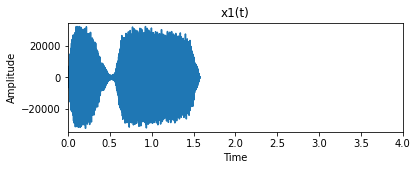

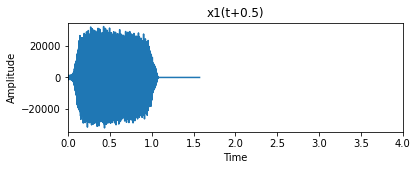

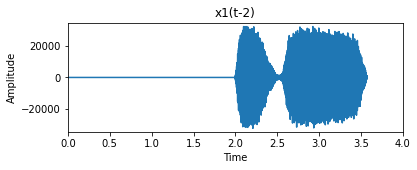

In [103]:
# Part B
# TODO: Code that solves B
_, t1 = timeshift(x1, fs1, 0)
x11, t11 = timeshift(x1, fs1, 0.5)
x111, t111 = timeshift(x1, fs1, -2)
plt.figure(5).set_figheight(2)
plt.plot(t1, x1)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("x1(t)")

plt.figure(6).set_figheight(2)
plt.plot(t11, x11)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("x1(t+0.5)")

plt.figure(7).set_figheight(2)
plt.plot(t111, x111)
plt.xlim(0, 4)
plt.ylim(-35000, 35000)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("x1(t-2)")

plt.show()

In [ ]:
# Part C
# TODO: Code that solves C

wav.write('train_x1.wav', fs1, x1.astype(np.int16))
wav.write('train_x11.wav', fs1, x11.astype(np.int16))
wav.write('train_x111.wav', fs1, x111.astype(np.int16))

sa.WaveObject.from_wave_file('train_x1.wav').play().wait_done()
sa.WaveObject.from_wave_file('train_x11.wav').play().wait_done()
sa.WaveObject.from_wave_file('train_x111.wav').play().wait_done()

### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

When the shift is set to zero, the signal remains unchanged and returns to its original state. However, if the shift is set to a value greater than the original signal, the original signal content will not be played. Therefore, the current implementation is functioning as intended.
